## 2.4.1 点互信息

In [1]:
import numpy as np


def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j] * S[i] + eps))
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total // 100 + 1) == 0:
                    print('%.1f%% done' % (100 * cnt / total))
    return M

In [2]:
import sys

sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

In [4]:
np.set_printoptions(precision=3)  # 有效位数为3位
print('covariance matrix')
print(C)
print('-' * 50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


## 2.4.3 基于SVD的降维

In [5]:
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

In [6]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

In [7]:
# SVD
U, S, V = np.linalg.svd(W)

In [8]:
print(C[0])  # 共现矩阵

[0 1 0 0 0 0 0]


In [9]:
print(W[0])  # PPMI矩阵

[0.    1.807 0.    0.    0.    0.    0.   ]


In [10]:
print(U[0])  # SVD

[-1.110e-16  3.409e-01 -1.205e-01 -4.163e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


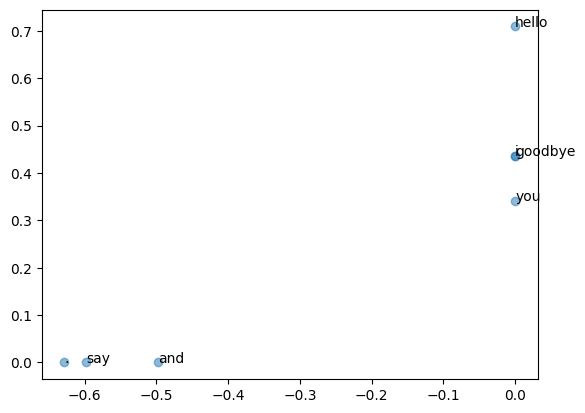

In [11]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

## 2.4.4 PTB数据集

In [12]:
import sys

sys.path.append('..')
from dataset import ptb

In [16]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

In [17]:
print('corpus size:', len(corpus))
print('corpus[:30]:', corpus[:30])

corpus size: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [18]:
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz


In [19]:
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [20]:
window_size = 2
wordvec_size = 100

In [21]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('counting co-occurrence ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('calculating PPMI ...')
W = ppmi(C, verbose=True)

counting co-occurrence ...
calculating PPMI ...


D:\python2\code7\NLP\01_深度学习进阶：自然语言处理\2_自然语言和单词的分布式表示\..\common\util.py:139: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
D:\python2\code7\NLP\01_深度学习进阶：自然语言处理\2_自然语言和单词的分布式表示\..\common\util.py:139: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% done
2.0% done
3.0% done
4.0% done
5.0% done
6.0% done
7.0% done
8.0% done
9.0% done
10.0% done
11.0% done
12.0% done
13.0% done
14.0% done
15.0% done
16.0% done
17.0% done
18.0% done
19.0% done
20.0% done
21.0% done
22.0% done
23.0% done
24.0% done
25.0% done
26.0% done
27.0% done
28.0% done
29.0% done
30.0% done
31.0% done
32.0% done
33.0% done
34.0% done
35.0% done
36.0% done
37.0% done
38.0% done
39.0% done
40.0% done
41.0% done
42.0% done
43.0% done
44.0% done
45.0% done
46.0% done
47.0% done
48.0% done
49.0% done
50.0% done
51.0% done
52.0% done
53.0% done
54.0% done
55.0% done
56.0% done
57.0% done
58.0% done
59.0% done
60.0% done
61.0% done
62.0% done
63.0% done
64.0% done
65.0% done
66.0% done
67.0% done
68.0% done
69.0% done
70.0% done
71.0% done
72.0% done
73.0% done
74.0% done
75.0% done
76.0% done
77.0% done
78.0% done
79.0% done
80.0% done
81.0% done
82.0% done
83.0% done
84.0% done
85.0% done
86.0% done
87.0% done
88.0% done
89.0% done
90.0% done
91.0% done
92.0% do

In [22]:
print('calculating SVD ...')
try:
    # truncated SVD (fast!)
    from sklearn.utils.extmath import randomized_svd

    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (slow)
    U, S, V = np.linalg.svd(W)

calculating SVD ...


In [23]:
word_vecs = U[:, :wordvec_size]

In [29]:
word_vecs

array([[-2.902e-11, -2.316e-07, -1.115e-06, ...,  1.803e-04,  1.620e-04,
         3.341e-05],
       [-1.455e-12, -8.809e-09,  1.563e-08, ...,  2.885e-04,  2.530e-04,
         5.083e-05],
       [-8.019e-13, -1.286e-09, -2.420e-08, ...,  4.033e-04,  3.527e-04,
         6.528e-05],
       ...,
       [ 4.426e-03, -6.480e-03,  1.145e-02, ...,  1.161e-02,  2.663e-03,
         1.013e-03],
       [ 2.459e-03, -4.921e-03,  8.025e-03, ..., -5.063e-04,  8.922e-03,
        -2.467e-05],
       [ 3.888e-03, -7.842e-03,  8.080e-03, ..., -2.764e-03, -7.744e-03,
        -1.042e-02]], dtype=float32)

In [27]:
from common.util import most_similar

In [28]:
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6768127679824829
 we: 0.6136245131492615
 do: 0.5688321590423584
 anybody: 0.5655081868171692
 'll: 0.5179653763771057

[query] year
 month: 0.6682701110839844
 quarter: 0.6501842737197876
 last: 0.6121847629547119
 third: 0.5968555808067322
 earlier: 0.5873135328292847

[query] car
 luxury: 0.6470903754234314
 auto: 0.6370578408241272
 corsica: 0.5464427471160889
 midsized: 0.5348365902900696
 cars: 0.5322224497795105

[query] toyota
 motor: 0.7418043613433838
 motors: 0.6874258518218994
 mazda: 0.5841508507728577
 nissan: 0.5772135853767395
 lexus: 0.5734121799468994
